# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [1]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show

class Cart():
    def __init__(self):
        self.items = {}
        
    def add(self):
        clear()
        new_item = input("What do you want to get? ")
        quantity = int(input(f"How many {new_item}s do you want? "))
        if new_item not in self.items:
            self.items[new_item] = quantity
        else:
            self.items[new_item] += quantity
        print(f"{quantity} {new_item}s have been added to the cart. 🛒")
    
    def remove(self):
        clear()
        discard = input("What would you like to discard? ")
        quantity = int(input(f"How many {discard}s would you like to put back? "))
        try:
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f"{quantity} {discard}s have been removed")
        except:
            print(f"{discard} was not in your cart.")
        #TODO: Create show method
        self.show()
    
    def show(self):
        print("Your cart contains the items below")
        print("   Item  |   Quantity")
        for item, quantity in self.items.items():
            print(f"{item} | {quantity}")
    
    def checkout(self):
        clear()
        if not self.items:
            print("Please come back and buy things")
        else:
            print("Thanks for shopping!")
            self.show()

# Control the logic and flow of our progress

class Main:
    def showInstructions(self):
        print("""
        Welcome to the Shopping Program!
        Optinos:
        [1] Show Current Cart
        [2] Add Item
        [3] Remove Item
        [4] Quit
        """)
        
    def run(self):
        my_cart = Cart()
        
        while True:
            self.showInstructions()
            choice = input("What would you like to do? ")
            if choice == '1':
                if my_cart.items:
                    my_cart.show()
                else:
                    print("Your cart is Empty...")
            elif choice == '2':
                my_cart.add()
            elif choice == '3':
                if my_cart.items:
                    my_cart.remove()
                else:
                    print("Your cart is empty... How are you going to remove nothing???")
            elif choice == '4':
                my_cart.checkout()
                break
            else:
                print("Invalid Response... Pleae select an option above.")

my_prog = Main()
my_prog.run()
                    

Please come back and buy things


# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [2]:
# making an API call
import requests

# after making a request with request.get() 
# check status code with "requests.status_code tp see if the request was successful: 200"

r = requests.get("https://pokeapi.co/api/v2/pokemon/swampert")

if r.status_code == 200:
    data = r.json() #converts information from json to python for us to use
else: print(f"Error Status Code: {r.status_code}")
    
print(data.keys())



dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


### Display a Pokemon's name, weight, abilities, and types

In [3]:
# get the name

name = data['name']
print(name)

swampert


In [4]:
# get types

types = [pokemon["type"]["name"] for pokemon in data["types"]]

print(types)

['water', 'ground']


In [5]:
# get weight

weight = data['weight']
print(weight)

819


In [6]:
# get abilities

abilities = [pokemon["ability"]["name"] for pokemon in data["abilities"]]
print(abilities)

['torrent', 'damp']


In [7]:
# Create a structure for a single pokemon

first_pokemon = {
    "name": "",
    "abilities": [],
    "weight": 0,
    "types": []
}

In [8]:
swampert = {
    "name": name,
    "abilities": abilities,
    "weight": weight,
    "types": types
}

swampert

{'name': 'swampert',
 'abilities': ['torrent', 'damp'],
 'weight': 819,
 'types': ['water', 'ground']}

#### Create a function to Pull in your own Pokemon's data 

In [9]:
def poke_api_call(pokemon):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon}")
    if r.status_code == 200:
        data = r.json()
        
        name = data['name']
        types = [objects['type']['name'] for objects in data['types']]
        abilities = [poke['ability']['name'] for poke in data['abilities']]
        weight = data['weight']
        
        pokemon_x = {
            "name":name,
            "abilities":abilities,
            "weight":weight,
            "types":types
        }
        return pokemon_x
    else:
        print(f"Error Status Code: {r.status_code}")
        
poke_api_call("charizard")


    

{'name': 'charizard',
 'abilities': ['blaze', 'solar-power'],
 'weight': 905,
 'types': ['fire', 'flying']}

Choose your pokemon

In [10]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [11]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for member in random_team:
    poke_stats = poke_api_call(member)
    my_six_pokemon[poke_stats["name"]] = poke_stats
    
print(my_six_pokemon)

{'crabrawler': {'name': 'crabrawler', 'abilities': ['hyper-cutter', 'iron-fist', 'anger-point'], 'weight': 70, 'types': ['fighting']}, 'typhlosion': {'name': 'typhlosion', 'abilities': ['blaze', 'flash-fire'], 'weight': 795, 'types': ['fire']}, 'brionne': {'name': 'brionne', 'abilities': ['torrent', 'liquid-voice'], 'weight': 175, 'types': ['water']}, 'girafarig': {'name': 'girafarig', 'abilities': ['inner-focus', 'early-bird', 'sap-sipper'], 'weight': 415, 'types': ['normal', 'psychic']}, 'skrelp': {'name': 'skrelp', 'abilities': ['poison-point', 'poison-touch', 'adaptability'], 'weight': 73, 'types': ['poison', 'water']}, 'rayquaza': {'name': 'rayquaza', 'abilities': ['air-lock'], 'weight': 2065, 'types': ['dragon', 'flying']}}


## Lets create a class called 'Pokemon' and create our pokemon as instances

In [12]:
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.poke_api_call() #right off the bat when inititated, call poke-api_call
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()

            self.name = data['name']
            self.types = [objects['type']['name'] for objects in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
        else:
            print(f"Error Status Code: {r.status_code}")
    
    #What happens when you print
    def __repr__(self):
        return f"You caught a {self.name}"
    

### Let's Catch some Pokemon

In [13]:
pikachu = Pokemon("pikachu")

print(pikachu)
print(type(pikachu))
print(pikachu.__dict__)

You caught a pikachu
<class '__main__.Pokemon'>
{'name': 'pikachu', 'types': ['electric'], 'abilities': ['static', 'lightning-rod'], 'weight': 60}


In [14]:
pokedex = {}

for member in your_team:
    pokeball = Pokemon(member) #will call and create your pokemon
    pokedex[member.title()] = pokeball

pokedex

{'Electabuzz': You caught a electabuzz,
 'Haunter': You caught a haunter,
 'Tyranitar': You caught a tyranitar,
 'Blaziken': You caught a blaziken,
 'Marowak': You caught a marowak,
 'Dragonair': You caught a dragonair}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [15]:
# recreate your pokemon class here
# class Pokemon:
#     pass

charmander = Pokemon("charizard")


In [16]:
# Calling our new method


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [17]:
from time import sleep

class Evolver:
    
    def evolve(self):
        #API call to pokemon-species endpoint:
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}")
        if r.status_code != 200:
            print(f"Species Status: {r.status_code}")
            return
        else:
            pokemon_species = r.json()
        
        r2 = requests.get(pokemon_species['evolution_chain']['url'])
        if r2.status_code != 200:
            print (f"Evolution Chain Error: {r2.status_code}")
            return
        else:
            ev_chain = r2.json()
            ev_chain = ev_chain['chain']
            
        #First Evolution
        base_name = ev_chain['species']['name']
        print(f"Base name: {base_name}")
        evolution = ev_chain['evolves_to'][0]
        
        #Form 2
        evolution_name = evolution['species']['name']
        print(evolution_name)
        if base_name == self.name:
            pass
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
        else:
            print(f"You can't evolve your {self.name} anymore.")
            return
        
        print(".....")
        sleep(1)
        print(f"Your {self.name} is evolving!")
        self.display()
        sleep(1)
        print("...........")
        self.name = evolution_name
        self.poke_api_call()
        self.display()
        print(self)
        
        
                                                                       



You caught a pikachu!


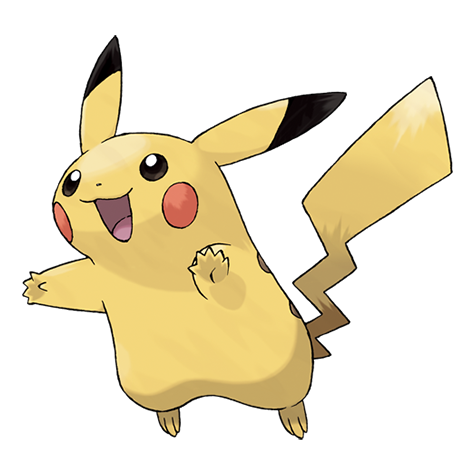

In [52]:
# Display an image in Jupyter notebook
from IPython.display import Image
class Pokemon(Evolver, Move_Tutor):
    def __init__(self,name):
        super().__init__()
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.image = ''
        self.poke_api_call()
        print(self)
        self.display()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()

            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
            self.image = data['sprites']['other']['official-artwork']['front_default']

        else:
            print(f"Error Status Code: {r.status_code}")
            
    def display(self):
        display(Image(self.image))
    # What happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"
# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))

pikachu = Pokemon("pikachu")

Now let's evolve a few

Base name: pichu
pikachu
.....
Your pikachu is evolving!


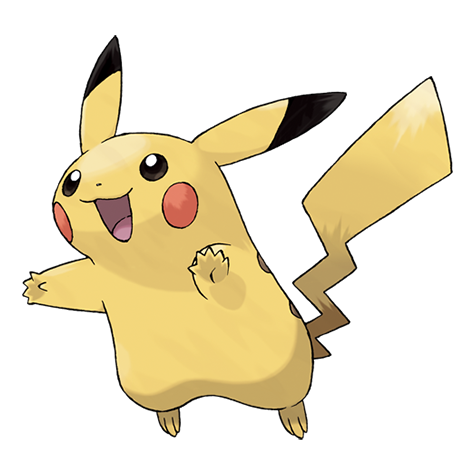

...........


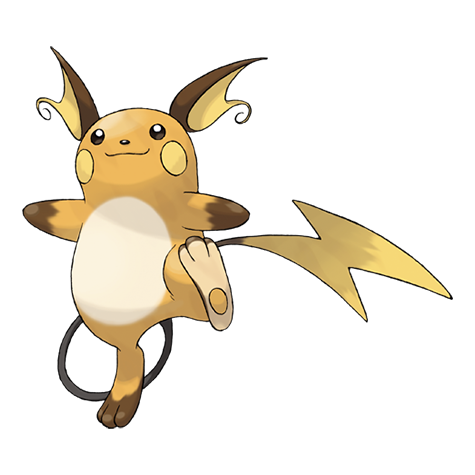

You caught a raichu!


In [34]:
pikachu.evolve()

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [51]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []
        self.all_moves = []
        
    def teach_move(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code != 200:
            print(f"Pokemon API Error: {r.status_code}")
        else:
            pokemon = r.json()
            pokemon = pokemon["moves"]
        
        print(f"You found the ULTIMATE TM!!\n")
        print("You can teach this pokemon any of its possible move-sets regardless of level!\n")
        
        self.all_moves = [i["move"]["name"] for i in pokemon]
        print(self.all_moves)
        selection = input(f"Which of these moves would you like {self.name} to learn? ").strip().lower()
        
        while selection not in self.all_moves:
            selection = input(f"Please select from the available move list! (Hint: Input is case sensitive)\nYou can also enter 'quit' to cancel. ").strip().lower()
            if selection == 'quit':
                return
        if selection in self.move_list:
            print(f"{selection} already learned!")
            return
        else:
            if len(self.move_list) >= 4:
                print(f"{self.name} cannot learn anymore moves!")
                unlearn_option = input("Would you like to unlearn a move? ").strip().lower()
                if unlearn_option == 'yes':
                    self.unlearn_move()        
            else:
                self.move_list.append(selection)
                print(f"{self.name} has now learned {selection}!")
                print(self.move_list)
    
    def unlearn_move(self):
        unlearn = input("You are about to unlearn a move. Are you sure you want to do this? (yes/no) ").strip().lower()
        if unlearn == 'yes':
            if not self.move_list:
                print(f"{self.name} has no moves to unlearn!")
            else:
                print(self.move_list)
                unlearn_choice = input("Which move would you like to unlearn? ").strip().lower()
                while unlearn_choice not in self.move_list:
                    unlearn_choice = input("Please choose from list. ('quit' to cancel) ").strip().lower()
                    if unlearn_choice == 'quit':
                        return
                self.move_list.remove(unlearn_choice)
                print(f"{self.name} has forgotten {unlearn_choice}!")
    def show_moves(self):
        print(f"Here is {self.name}'s move-set.")
        print(self.move_list)
                
  

You caught a charmander!


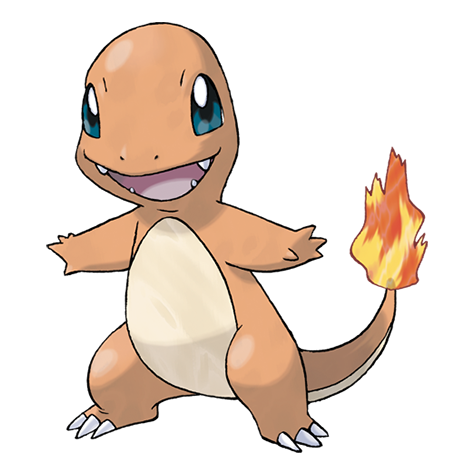

In [53]:
charmander = Pokemon("charmander")

In [58]:
charmander.teach_move()

You found the ULTIMATE TM!!

You can teach this pokemon any of its possible move-sets regardless of level!

['mega-punch', 'fire-punch', 'thunder-punch', 'scratch', 'swords-dance', 'cut', 'wing-attack', 'mega-kick', 'headbutt', 'body-slam', 'take-down', 'double-edge', 'leer', 'bite', 'growl', 'ember', 'flamethrower', 'submission', 'counter', 'seismic-toss', 'strength', 'dragon-rage', 'fire-spin', 'dig', 'toxic', 'rage', 'mimic', 'double-team', 'smokescreen', 'defense-curl', 'reflect', 'bide', 'fire-blast', 'swift', 'skull-bash', 'fury-swipes', 'rest', 'rock-slide', 'slash', 'substitute', 'snore', 'curse', 'protect', 'scary-face', 'belly-drum', 'mud-slap', 'outrage', 'endure', 'false-swipe', 'swagger', 'fury-cutter', 'attract', 'sleep-talk', 'return', 'frustration', 'dynamic-punch', 'dragon-breath', 'iron-tail', 'metal-claw', 'hidden-power', 'sunny-day', 'crunch', 'ancient-power', 'rock-smash', 'beat-up', 'heat-wave', 'will-o-wisp', 'facade', 'focus-punch', 'helping-hand', 'brick-break'

In [59]:
charmander.show_moves()

Here is charmander's move-set.
['inferno', 'skull-bash', 'beat-up']


In [49]:
pikachu.teach_move()


You found the ULTIMATE TM!!

You can teach this pokemon any of its possible move-sets regardless of level!

['mega-punch', 'pay-day', 'thunder-punch', 'slam', 'double-kick', 'mega-kick', 'headbutt', 'body-slam', 'take-down', 'double-edge', 'tail-whip', 'growl', 'surf', 'submission', 'counter', 'seismic-toss', 'strength', 'thunder-shock', 'thunderbolt', 'thunder-wave', 'thunder', 'dig', 'toxic', 'agility', 'quick-attack', 'rage', 'mimic', 'double-team', 'defense-curl', 'light-screen', 'reflect', 'bide', 'swift', 'skull-bash', 'flash', 'rest', 'substitute', 'thief', 'snore', 'curse', 'reversal', 'protect', 'sweet-kiss', 'mud-slap', 'zap-cannon', 'detect', 'endure', 'charm', 'rollout', 'swagger', 'spark', 'attract', 'sleep-talk', 'return', 'frustration', 'dynamic-punch', 'encore', 'iron-tail', 'hidden-power', 'rain-dance', 'rock-smash', 'uproar', 'facade', 'focus-punch', 'helping-hand', 'brick-break', 'knock-off', 'secret-power', 'signal-beam', 'covet', 'volt-tackle', 'calm-mind', 'shock-

In [50]:
pikachu.show_moves()

Here are pikachu's move-set.
['play-rough', 'thunderbolt']
